In [69]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest
import pandas as pd


In [3]:
nlp = spacy.load('en_core_web_sm')

In [8]:
from docx import Document
document = Document('./../Bachelor_Thesis_stefan.docx')

In [12]:
paragraphs = document.paragraphs
text = ''

for i, p in enumerate(paragraphs):
    #if len(p.text) > 100:
    text += p.text

In [13]:
doc = nlp(text)

In [47]:
STOP_WORDS = list(STOP_WORDS)

In [57]:
'In' in STOP_WORDS

False

In [31]:
punctuation = list(punctuation)

In [36]:
punctuation.append('“')
punctuation.append('”')

In [77]:
words = {}
for word in doc:
    if word.lemma_.lower() not in STOP_WORDS and word.lemma_.lower() not in punctuation and len(word.text) > 1:
        if word.lemma_.lower() in words.keys():
            words[word.lemma_.lower()] += 1
        else:
            words[word.lemma_.lower()] = 1

In [78]:
words

{'improve': 12,
 'linde': 91,
 'corporate': 62,
 'demand': 81,
 'process': 120,
 'business': 140,
 'capability': 66,
 'management?analysis': 1,
 'core': 21,
 'deliver': 56,
 'product': 76,
 'bachelor': 3,
 'thesissubmitte': 1,
 '20.04.2023fromstefan': 1,
 'kuchenbauer': 1,
 '8885219)confidentiality': 1,
 'statementthe': 1,
 'diploma': 1,
 'thesis': 12,
 'hand“[topic]”contains': 1,
 'internal': 8,
 'resp': 1,
 'confidential': 1,
 'datum': 34,
 'plc': 13,
 'dublin': 1,
 'content': 11,
 'work': 31,
 'accessible': 1,
 'people': 5,
 'outside': 6,
 'testing': 1,
 'evaluation': 3,
 'excerpt': 2,
 'authorisation': 1,
 'state': 11,
 'present': 25,
 'training': 2,
 'facility': 7,
 'abstractlorem': 1,
 'ipsum': 104,
 'lorem': 102,
 '\n\n': 1,
 'table': 26,
 'figures': 1,
 'list': 17,
 'tables': 1,
 'abbreviations': 1,
 'adm': 18,
 'architecture': 127,
 'development': 16,
 'methodasu': 1,
 'air': 4,
 'separation': 2,
 'unitbc': 1,
 'capabilitycapex': 1,
 'capital': 3,
 'expenditurescobit': 1,
 'co

In [79]:
arr = nlargest(20, words, key=words.get)

In [80]:
arr_2d = [[x, words.get(x)] for x in arr]

In [81]:
arr_2d

[['bc', 143],
 ['business', 140],
 ['architecture', 127],
 ['process', 120],
 ['ipsum', 104],
 ['lorem', 102],
 ['use', 101],
 ['linde', 91],
 ['cylinder', 82],
 ['demand', 81],
 ['customer', 80],
 ['product', 76],
 ['information', 70],
 ['application', 67],
 ['capability', 66],
 ['company', 66],
 ['analysis', 63],
 ['order', 63],
 ['corporate', 62],
 ['togaf', 58]]

In [82]:
df = pd.DataFrame(data=arr_2d, columns=['Words', 'Occurences'], index=arr)

<Axes: >

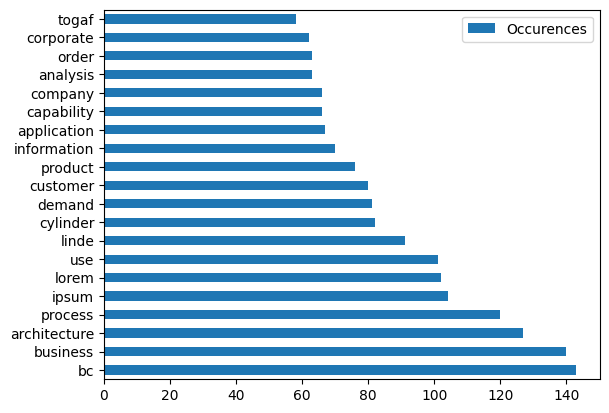

In [83]:
df.plot.barh()